**Clustering Notes** 
=====================

### What is Clustering?
--------------------

Clustering is a type of unsupervised machine learning algorithm that groups similar objects or data points into clusters based on their characteristics or features. 

### Types of Clustering
--------------------

### 1. **Hierarchical Clustering** 

Hierarchical clustering is a method of clustering that builds a hierarchy of clusters by merging or splitting existing clusters. It can be further divided into:

* **Agglomerative Clustering** : This method starts with each data point as its own cluster and merges them into larger clusters.

![Agglomerative Clustering](https://images.datacamp.com/image/upload/v1674149819/Dendrogram_of_Agglomerative_Clustering_Approach_4eba3586ec.png) 🏰

* **Divisive Clustering** : This method starts with all data points in a single cluster and splits them into smaller clusters.

### 2. **K-Means Clustering** 

K-means clustering is a method of clustering that partitions the data into K clusters based on their similarities. It is a popular and widely used clustering algorithm.

![K-Means Clustering](https://images.datacamp.com/image/upload/v1678462092/image7_a1777d39aa.png) 

### 3. **DBSCAN Clustering** 📍

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a method of clustering that groups data points into clusters based on their density and proximity to each other.

![DBSCAN Clustering](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif) 

### Applications of Clustering
---------------------------

### 1. **Customer Segmentation** 

Clustering can be used to segment customers based on their demographics, behavior, and preferences.

### 2. **Image Segmentation** 

Clustering can be used to segment images into different regions based on their characteristics.

### 3. **Gene Expression Analysis** 

Clustering can be used to analyze gene expression data and identify patterns and relationships between genes.

### Clustering Evaluation Metrics
------------------------------

### 1. **Silhouette Coefficient** 

The silhouette coefficient is a measure of how similar an object is to its own cluster compared to other clusters.

### 2. **Calinski-Harabasz Index** 

The Calinski-Harabasz index is a measure of the ratio of between-cluster variance to within-cluster variance.

### 3. **Davies-Bouldin Index** 

The Davies-Bouldin index is a measure of the similarity between clusters.

### Clustering Algorithms
----------------------

### 1. **K-Means Algorithm** 

The K-means algorithm is a popular clustering algorithm that partitions the data into K clusters based on their similarities.

### 2. **Hierarchical Clustering Algorithm** 

The hierarchical clustering algorithm builds a hierarchy of clusters by merging or splitting existing clusters.

### 3. **DBSCAN Algorithm** 

The DBSCAN algorithm groups data points into clusters based on their density and proximity to each other.

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## K-Means Clustering

In [325]:
from sklearn.datasets import make_blobs

In [326]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5) # type: ignore

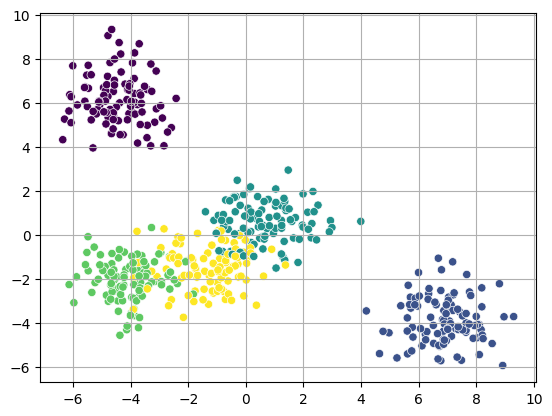

In [327]:
sns.scatterplot(x = X[:,0], y = X[:,1], c= y)
plt.grid()
plt.show()

In [328]:
colors = ['pink', 'green', 'red', 'blue', 'orange']

In [329]:
vals = np.random.randint(low = -10, high = 10, size=(5, 2))
print(vals)

[[-9  5]
 [ 1 -4]
 [ 6 -5]
 [ 9  7]
 [ 8  0]]


In [330]:
clusters = {}

for i in range(5):
    cluster = {
		'center': vals[i],
		'points': [],
		'color' : colors[i]
	}
    clusters[i] = cluster

In [331]:
clusters

{0: {'center': array([-9,  5]), 'points': [], 'color': 'pink'},
 1: {'center': array([ 1, -4]), 'points': [], 'color': 'green'},
 2: {'center': array([ 6, -5]), 'points': [], 'color': 'red'},
 3: {'center': array([9, 7]), 'points': [], 'color': 'blue'},
 4: {'center': array([8, 0]), 'points': [], 'color': 'orange'}}

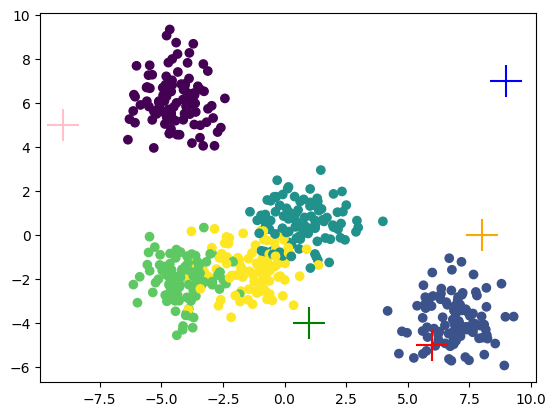

In [332]:
plt.scatter(x=X[:,0], y = X[:, 1], c= y)
for i in clusters:
    plt.scatter(x = clusters[i]['center'][0], y = clusters[i]['center'][1], c = clusters[i]['color'], marker = '+', s = 500)

In [333]:
def euclidean_distance(one, two):
    val = (sum((two - one) ** 2)) ** (1/2)
    return val

In [334]:
def assign_clusters():
    for i in range(X.shape[0]):
        dist = []
        for j in range(5):
            distance = euclidean_distance(X[i], clusters[j]['center'])
            dist.append(distance)
        min_idx = np.argmin(dist)
        clusters[min_idx]['points'].append(X[i])

In [335]:
def plot_clusters():
    for i in range(5):
        points = np.array(clusters[i]['points'])
        try : 
            plt.scatter(x = points[:,0], y = points[:,1], c = clusters[i]['color'])
            
        except:
            pass
        plt.scatter(x = clusters[i]['center'][0], y = clusters[i]['center'][0], c =clusters[i]['color'] , marker = '+', s = 500)
    plt.show()

In [336]:
def update_centers():
    for i in range(5):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            mean_value = points.mean(axis = 0)
            print(mean_value)
            clusters[i]['center'] = mean_value
            clusters[i]['points'] = []

In [337]:
def do_cluster():
    for i in range(20):
        assign_clusters()
        plot_clusters()
        update_centers()
    assign_clusters()
    plot_clusters()

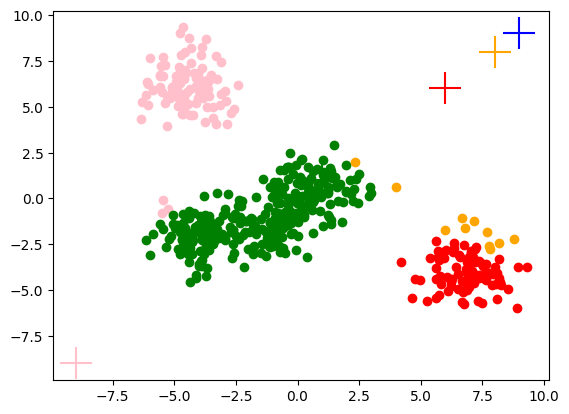

[-4.47515711  5.91885672]
[-1.51856302 -1.02420109]
[ 6.8509588  -4.07345623]
[ 6.65519921 -1.35531971]


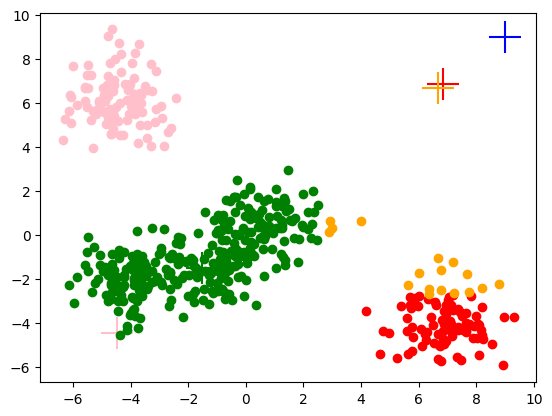

[-4.44679806  6.11113982]
[-1.59030696 -1.02275068]
[ 6.88391017 -4.14742757]
[ 6.13162633 -1.50845281]


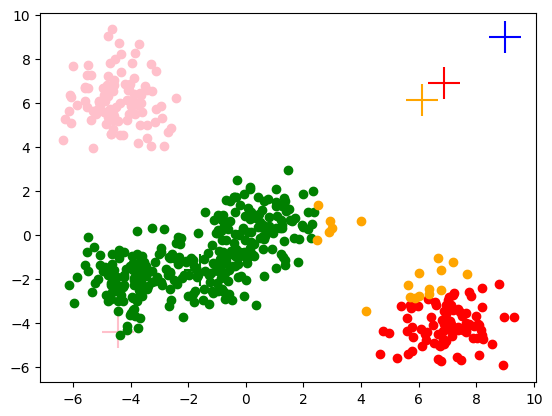

[-4.44679806  6.11113982]
[-1.61799767 -1.03345841]
[ 7.00101742 -4.12339366]
[ 5.2110407 -1.4016883]


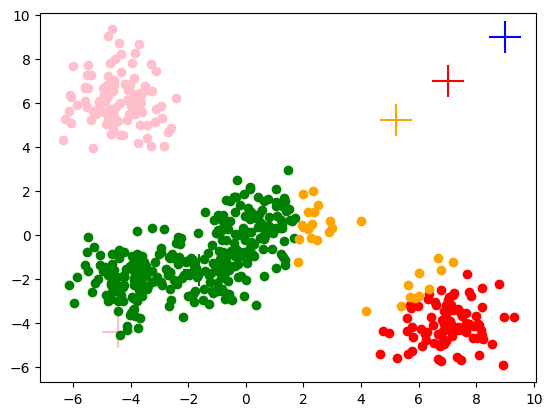

[-4.44679806  6.11113982]
[-1.76279933 -1.09404133]
[ 7.01680779 -4.0734525 ]
[ 3.81368896 -0.60904031]


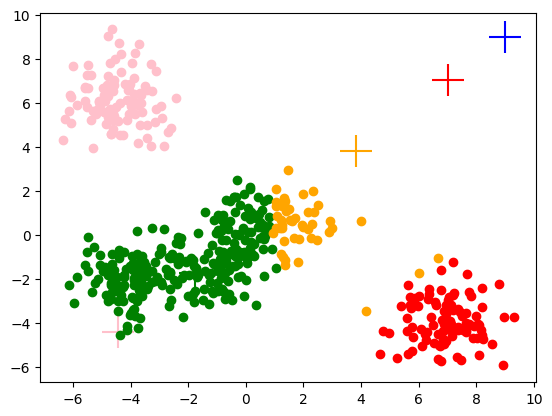

[-4.44679806  6.11113982]
[-2.07294984 -1.26586118]
[ 6.94288977 -3.93703883]
[1.99336466 0.39163027]


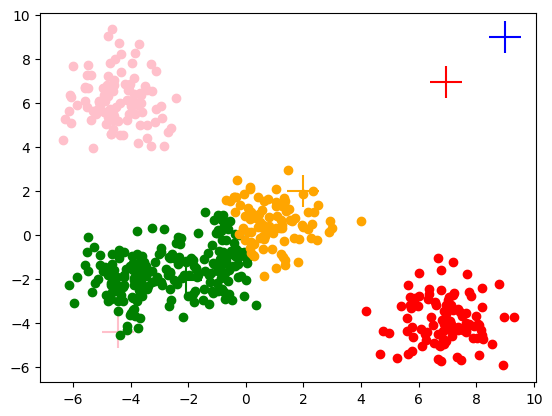

[-4.44679806  6.11113982]
[-2.59225467 -1.66694898]
[ 6.90322303 -3.88158228]
[0.96064613 0.54459352]


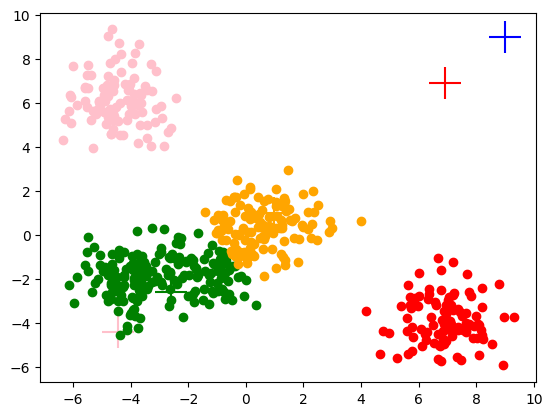

[-4.44679806  6.11113982]
[-2.93001201 -1.91124095]
[ 6.90322303 -3.88158228]
[0.57905693 0.35814585]


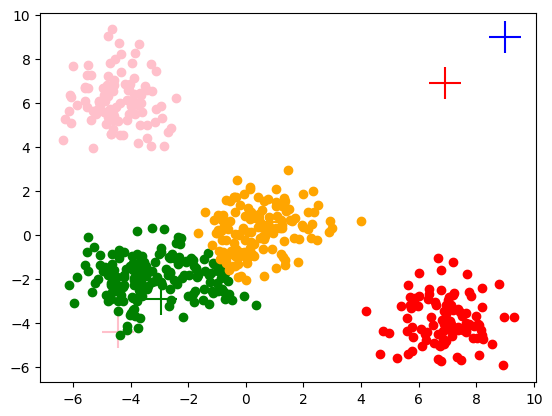

[-4.44679806  6.11113982]
[-3.13589745 -1.97749089]
[ 6.90322303 -3.88158228]
[0.44079814 0.18696391]


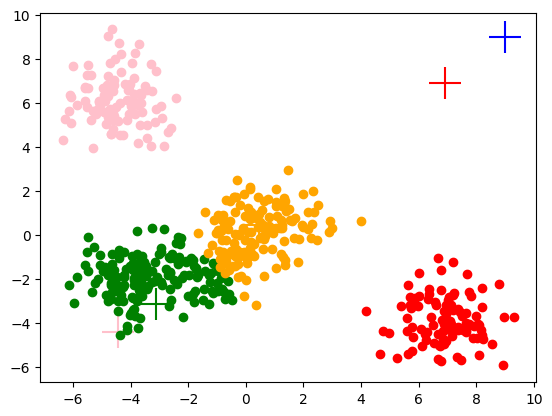

[-4.44679806  6.11113982]
[-3.21734174 -1.97653886]
[ 6.90322303 -3.88158228]
[0.40613821 0.10857392]


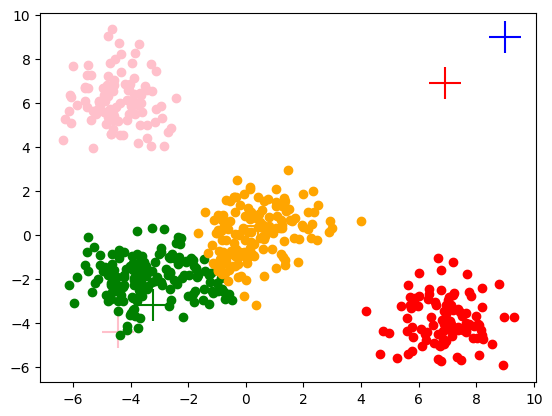

[-4.44679806  6.11113982]
[-3.30627458 -1.98972926]
[ 6.90322303 -3.88158228]
[0.35103394 0.03679751]


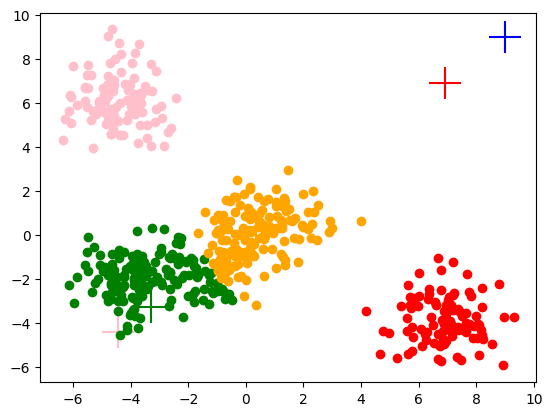

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


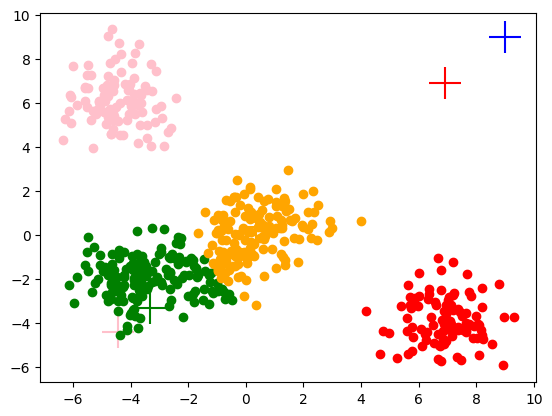

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


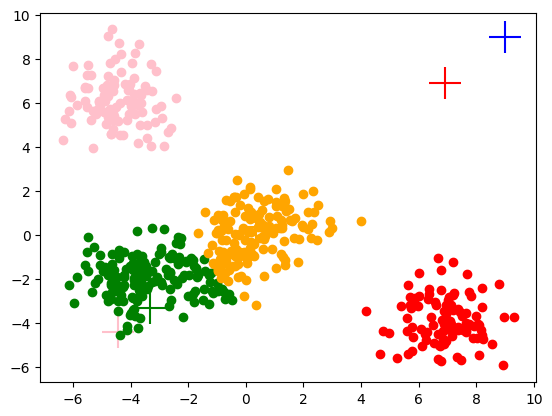

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


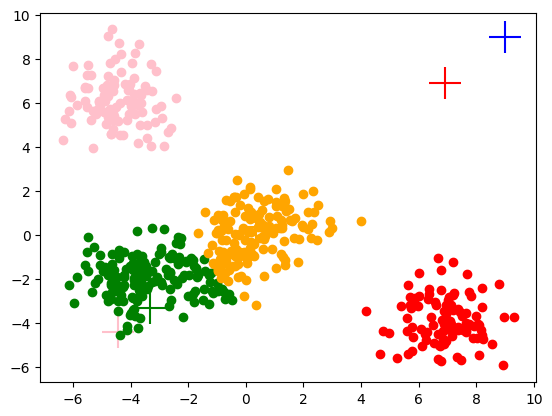

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


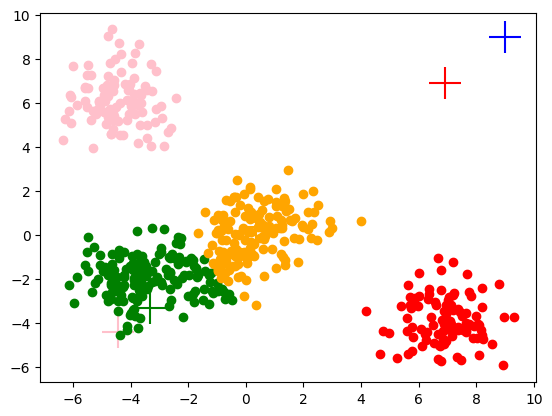

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


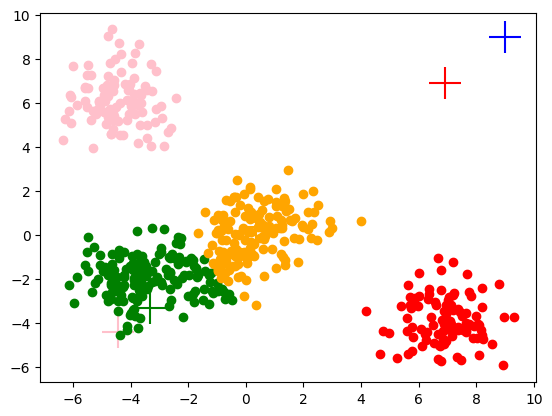

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


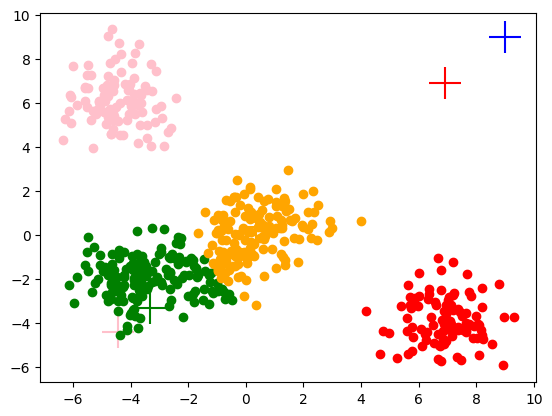

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


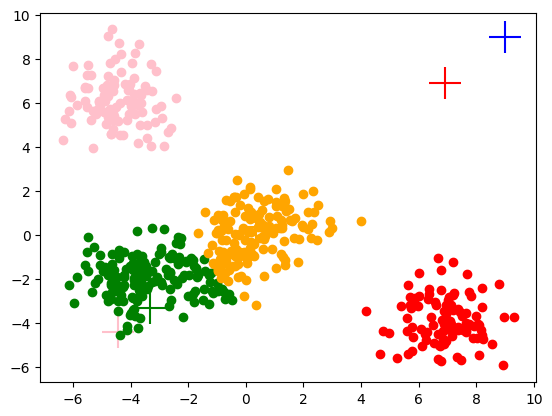

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


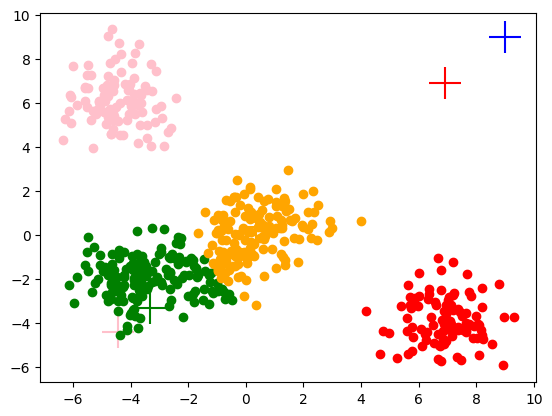

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


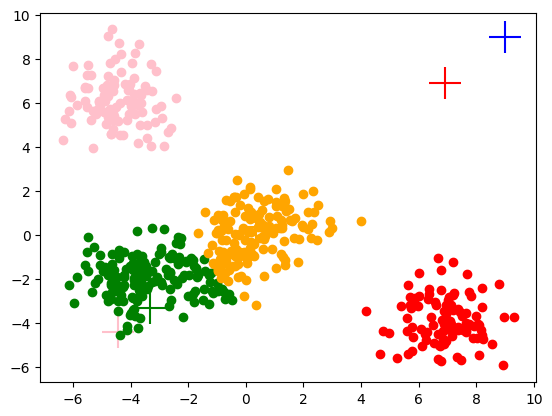

[-4.44679806  6.11113982]
[-3.32230218 -1.98990691]
[ 6.90322303 -3.88158228]
[0.34283608 0.02319652]


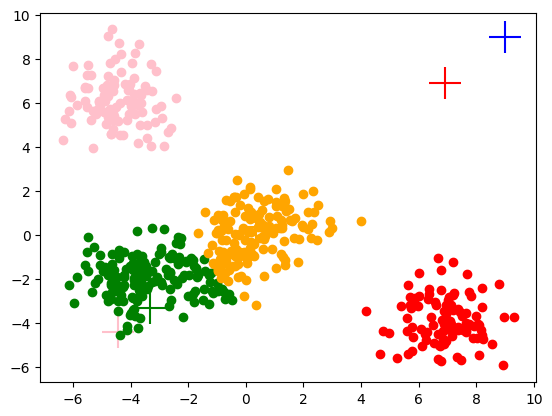

In [338]:
do_cluster()